In [1]:

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv
/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv
/kaggle/input/sentimental/vader_lexicon.txt


In [2]:
biden = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_joebiden.csv', lineterminator='\n', 
                    parse_dates=True)
trump = pd.read_csv('/kaggle/input/us-election-2020-tweets/hashtag_donaldtrump.csv', lineterminator='\n', 
                    parse_dates=True)

In [3]:
biden.shape

(776886, 21)

In [4]:
biden.head(5)

created_at      tweet_id  \
0  2020-10-15 00:00:01  1.316529e+18   
1  2020-10-15 00:00:18  1.316529e+18   
2  2020-10-15 00:00:20  1.316529e+18   
3  2020-10-15 00:00:21  1.316529e+18   
4  2020-10-15 00:00:22  1.316529e+18   

                                               tweet  likes  retweet_count  \
0  #Elecciones2020 | En #Florida: #JoeBiden dice ...    0.0            0.0   
1  #HunterBiden #HunterBidenEmails #JoeBiden #Joe...    0.0            0.0   
2  @IslandGirlPRV @BradBeauregardJ @MeidasTouch T...    0.0            0.0   
3  @chrislongview Watching and setting dvr. Let’s...    0.0            0.0   
4  #censorship #HunterBiden #Biden #BidenEmails #...    1.0            0.0   

               source       user_id           user_name user_screen_name  \
0           TweetDeck  3.606665e+08  El Sol Latino News  elsollatinonews   
1    Twitter for iPad  8.099044e+08         Cheri A. 🇺🇸     Biloximeemaw   
2     Twitter Web App  3.494182e+09          Flag Waver      Flag_Wavers   
3  Twitter for iPhone  8.242596e+17       Michelle Ferg    MichelleFerg4   
4     Twitter Web App  1.032807e+18      the Gold State    theegoldstate   

                                    user_description  ...  \
0  🌐 Noticias de interés para latinos de la costa...  ...   
1  Locked and loaded Meemaw. Love God, my family ...  ...   
2                                                NaN  ...   
3                                                NaN  ...   
4  A Silicon Valley #independent #News #Media #St...  ...   

  user_followers_count                 user_location        lat        long  \
0               1860.0  Philadelphia, PA / Miami, FL  25.774270  -80.193660   
1               6628.0                           NaN        NaN         NaN   
2               1536.0         Golden Valley Arizona  46.304036 -109.171431   
3                 27.0                           NaN        NaN         NaN   
4                390.0               California, USA  36.701463 -118.755997   

   city                   country      continent       state state_code  \
0   NaN  United States of America  North America     Florida         FL   
1   NaN                       NaN            NaN         NaN        NaN   
2   NaN  United States of America  North America     Montana         MT   
3   NaN                       NaN            NaN         NaN        NaN   
4   NaN  United States of America  North America  California         CA   

                    collected_at  
0            2020-10-21 00:00:00  
1  2020-10-21 00:00:00.517827283  
2  2020-10-21 00:00:01.035654566  
3  2020-10-21 00:00:01.553481849  
4  2020-10-21 00:00:02.071309132  

[5 rows x 21 columns]

In [5]:
#check null values
biden_null = biden.isna().sum()
biden_null[biden_null != 0]

source                 713
user_name               18
user_description     82006
user_location       233791
lat                 421593
long                421593
city                590014
country             423107
continent           423089
state               516691
state_code          532277
dtype: int64

In [6]:
import re

#check if my regex works
hashtag = r'#[a-zA-Z]{1,}'
text_sample = 'hello #blacklivesmatter #myname'
re.findall(hashtag, text_sample)

['#blacklivesmatter', '#myname']

In [7]:
#get all the hashtags from every single tweet
all_hashtags_biden = []
for tweet in biden['tweet']:
    array_hash = re.findall(hashtag, tweet)
    for elem in array_hash:
        all_hashtags_biden.append(elem)

In [8]:
from collections import Counter

#count how many times each hastag appears
counter_hash_biden = Counter(all_hashtags_biden)
counter_hash_biden

Counter({'#Elecciones': 18622,
         '#Florida': 4532,
         '#JoeBiden': 272551,
         '#DonaldTrump': 36422,
         '#PembrokePines': 2,
         '#Miramar': 3,
         '#ElSolLatino': 29,
         '#yobrilloconelsol': 49,
         '#HunterBiden': 11267,
         '#HunterBidenEmails': 3700,
         '#JoeBidenMustStepDown': 23,
         '#Biden': 453626,
         '#TrumpIsNotAmerica': 876,
         '#censorship': 789,
         '#BidenEmails': 1015,
         '#BidenEmail': 5,
         '#Corruption': 1251,
         '#AmyConeyBarrett': 948,
         '#CoryBooker': 18,
         '#Barrett': 214,
         '#Booker': 11,
         '#Trump': 183963,
         '#KamalaHarris': 33421,
         '#SCOTUS': 1414,
         '#SupremeCourtConfirmation': 51,
         '#NYPost': 635,
         '#CENSORED': 53,
         '#China': 5631,
         '#Deomocrat': 9,
         '#Election': 97063,
         '#Politician': 35,
         '#Politics': 1329,
         '#President': 4884,
         '#Republica

In [9]:
len(counter_hash_biden)

149413

In [10]:
#sort hashtag occurrences from most to least
most_common = sorted(counter_hash_biden.items(), key = lambda x: x[1], reverse = True)
print(most_common)

[('#Biden', 453626), ('#JoeBiden', 272551), ('#Trump', 183963), ('#Election', 97063), ('#BidenHarris', 75277), ('#biden', 65920), ('#Elections', 50094), ('#DonaldTrump', 36422), ('#trump', 35763), ('#KamalaHarris', 33421), ('#ElectionDay', 33074), ('#USElection', 25360), ('#joebiden', 23713), ('#USA', 21187), ('#Vote', 19650), ('#Elecciones', 18622), ('#ElectionNight', 18030), ('#vote', 15757), ('#ElectionResults', 14919), ('#bidenharis', 14790), ('#election', 14067), ('#USElections', 13790), ('#COVID', 13539), ('#USAElections', 13265), ('#Debates', 12616), ('#MAGA', 12184), ('#JoeBidenKamalaHarris', 11964), ('#VOTE', 11936), ('#HunterBiden', 11267), ('#USAelection', 11214), ('#USElectionResults', 11025), ('#JOEBIDEN', 11019), ('#America', 10944), ('#Harris', 10101), ('#Democrats', 9943), ('#elections', 9859), ('#TrumpvsBiden', 9221), ('#Pennsylvania', 9050), ('#BIDEN', 8933), ('#ByeByeTrump', 8383), ('#Obama', 7746), ('#TrumpMeltdown', 7638), ('#PresidentialDebate', 7602), ('#Presiden

In [11]:
#keys are the hashtag words and values are the number of occurences
keys_biden = np.array([*counter_hash_biden.keys()]) #array of all the keys/hashtags
values_biden = np.array([*counter_hash_biden.values()])

In [12]:
keys_biden

array(['#Elecciones', '#Florida', '#JoeBiden', ..., '#erkense',
       '#congiuntifuoriregione', '#JillJacobs'], dtype='<U89')

In [13]:
#add all hashtag into a single string to use for wordcloud
text_hash = ''
for elem in keys_biden:
    text_hash += ' '
    text_hash += elem

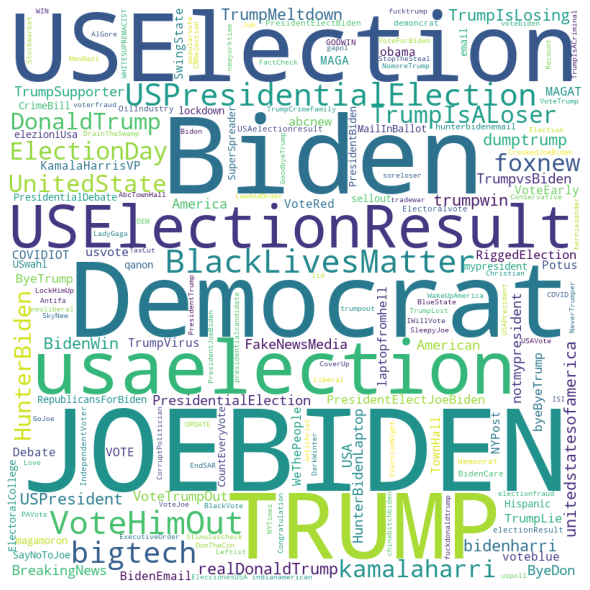

In [14]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)

wordcloud = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                     min_font_size = 10).generate(text_hash)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [15]:
#get only swing states
swing_biden = biden[(biden['state'] == 'Michigan') | (biden['state'] == 'Pennsylvania') | 
                    (biden['state'] == 'Wisonsin')]

#Vader text with sentimental value
sent = pd.read_csv('/kaggle/input/sentimental/vader_lexicon.txt', sep = '\t', index_col = 0, 
                   header = None).drop([2,3], axis = 1).rename(columns={1: 'polarity'})

#lower all tweet
swing_biden['tweet'] = swing_biden['tweet'].str.lower()

#Get rid of all punctutations
punct_re = r'[^(\w)(\s)]'
swing_biden['no_punc'] = swing_biden['tweet'].str.replace(punct_re, ' ', regex = True) 

#Make new dataframe
tidy_format = pd.DataFrame(swing_biden['no_punc'].str.split(expand = True).stack()).reset_index(level = 1).rename(columns = {'level_1' : 'num', 0 : 'word'})

tidy_format2 = tidy_format
tidy_format2['index'] = tidy_format.index

#make polarity column
swing_biden['polarity'] = tidy_format2.merge(sent, how = 'left', left_on = 'word', right_on = 0).fillna(0).groupby('index').sum()['polarity']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

In [16]:
swing_biden

created_at      tweet_id  \
139     2020-10-15 00:09:09  1.316532e+18   
233     2020-10-15 00:14:41  1.316533e+18   
294     2020-10-15 00:17:46  1.316534e+18   
317     2020-10-15 00:19:05  1.316534e+18   
396     2020-10-15 00:23:31  1.316535e+18   
...                     ...           ...   
776619  2020-11-08 23:38:40  1.325584e+18   
776646  2020-11-08 23:40:42  1.325584e+18   
776773  2020-11-08 23:50:23  1.325586e+18   
776845  2020-11-08 23:56:15  1.325588e+18   
776847  2020-11-08 23:56:21  1.325588e+18   

                                                    tweet  likes  \
139     the 6 most misleading claims from #joebiden:  ...    0.0   
233     politico: #biden campaign ‘would not rule out ...    0.0   
294     disqualified. withdrawal from the race. #joebi...    1.0   
317     #joebiden's homes. the sacrifices of public se...    1.0   
396           #memes #this #biden https://t.co/enkuzxobqg    0.0   
...                                                   ...    ...   
776619                              @howardfineman #biden    1.0   
776646                              @howardfineman #biden    1.0   
776773  just a reminder that the #republican party @go...    3.0   
776845  will #criticalracetheory become ubiquitous in ...    0.0   
776847   you moving near #biden 🤔 https://t.co/1f6i1yij2p    0.0   

        retweet_count               source       user_id            user_name  \
139               0.0      Twitter Web App  4.095715e+08       Howard Wachtel   
233               0.0   Twitter for iPhone  4.616222e+07             Lost Owl   
294               0.0   Twitter for iPhone  4.122967e+08  TheRealJoeBedridden   
317               2.0  Twitter for Android  9.002876e+07    Vladz Hammer 🏆 🇺🇸   
396               0.0  Twitter for Android  1.378511e+08  Mandi💙💙💙🌊🌊🌊🦄🦄👽👽❤💚🧡💜   
...               ...                  ...           ...                  ...   
776619            0.0   Twitter for iPhone  3.904382e+08        Brett Rapp 🇺🇸   
776646            0.0   Twitter for iPhone  3.180996e+09   Barbara Cunningham   
776773            0.0   Twitter for iPhone  2.666289e+08        R.J. Hufnagel   
776845            0.0      Twitter Web App  4.095715e+08       Howard Wachtel   
776847            0.0   Twitter for iPhone  1.914600e+08        Sean Lassiter   

       user_screen_name                                   user_description  \
139        mindovermath  Retired college #math professor. Single.  Brid...   
233           lostowl62  Writing, hiking, biking, maps, the Juniata Riv...   
294          Immortal_J       MBA, MIT Business, DU, Small business owner.   
317         Vladzhammer  🎙AMP Podcasting HOF 🏆, CoHost OFR, Conspiracy ...   
396     FaerieGlitter21  True and Blue girl from #Michigan #resistance ...   
...                 ...                                                ...   
776619           bmrapp                                                NaN   
776646        barb62197                                                NaN   
776773            RJHuf  Writer/Editor, USW@Work @steelworkers. Former ...   
776845     mindovermath  Retired college #math professor. Single.  Brid...   
776847  IAmSeanLassiter                          Sean Lassiter Photography   

        ...        lat       long          city                   country  \
139     ...  39.952724 -75.163526  Philadelphia  United States of America   
233     ...  40.969989 -77.727883           NaN  United States of America   
294     ...  40.462069 -79.923952    Pittsburgh  United States of America   
317     ...  40.969989 -77.727883           NaN  United States of America   
396     ...  42.331551 -83.046640       Detroit  United States of America   
...     ...        ...        ...           ...                       ...   
776619  ...  40.441694 -79.990086    Pittsburgh  United States of America   
776646  ...  40.441694 -79.990086    Pittsburgh  United States of America   
776773  ...  40.441694 -79.990086    Pittsburgh  United 

In [17]:
print('Most negative tweets:')
for t in swing_biden.sort_values('polarity').head()['tweet']:
    print('\n  ', t)

Most negative tweets:

   i am real tired. 
real tired of racists.
real tired of sexists.
real tired of the patriarchy. 
real tired of homophobics.
real tired of xenophobics.
real tired of this president. 
real tired of his administration.
real tired of the spineless gop. 

#vote  #voteblue #biden

   @kirstiealley @kirstiealley worst scandal in us history philadelphia is cheating nonstop as is the state of pennsylvania. absolutely a disgrace. are we really supposed to believe that #joebiden had more votes than @barackobama had?? i’m calling bullshit!! something stinks 😷 💩 #fraud #lies

   if you haven't #voted here is the #man to put in the office of the wh...it's time to flip from the #evil that has been sitting in the wh the last 4 years who hasn't done anything except: #violence #lying #killing #racism #hate being inappropriate #women...#enoughisenough #biden https://t.co/hhrywtnl9u

   1. arrested man allegedly planned to murder former vice president biden &amp; other horrific act

In [18]:
print('Most positive tweets:')
for t in swing_biden.sort_values('polarity', ascending=False).head()['tweet']:
    print('\n  ', t)

Most positive tweets:

   i still predict #joebiden will win the presidency and we will hold congress. i hope we win the senate but it's not looking good.  if we can get to 49, and biden wins presidency, kamala harris will be needed as the 50th vote. i wanted the wins to be easy but they aren't. yes it's

   @mikebloomberg mr bloomberg, i’m a senior citizen, raised with values, respect, faith and a love of this country. thank you for your help on behalf of #joebiden. i hope you know this is looked upon with gratitude by many people! just not all were taught to send thank u notes!👏😇

   we did it!! thank you black and latinx voters!!  thank you pennsylvania, especially philadelphia and pittsburgh. biden/harris presidency!! hope is restored to our country. love and respect wins. #electionday #biden #harris #bidenharris #democracy #democrat #blue #love #us

   @ariannahuff who do we admire?

when a praise worthy american like admiral mcraven endorses #joebiden we know who he admires. we k

In [19]:
#get all hashtags from tweet
all_hashtags_trump = []
for tweet in trump['tweet']:
    array_hash = re.findall(hashtag, tweet)
    for elem in array_hash:
        all_hashtags_trump.append(elem)

In [20]:
#count occurrence of each hashtag
counter_hash_trump = Counter(all_hashtags_trump)
counter_hash_trump

Counter({'#Elecciones': 22905,
         '#Florida': 6930,
         '#JoeBiden': 49901,
         '#DonaldTrump': 122407,
         '#PembrokePines': 2,
         '#Miramar': 3,
         '#ElSolLatino': 36,
         '#yobrilloconelsol': 52,
         '#donaldtrump': 13371,
         '#Trump': 755348,
         '#Iowa': 1307,
         '#TheReidOut': 105,
         '#trump': 151929,
         '#WhiteHouse': 5124,
         '#Election': 98854,
         '#FreedomOfSpeech': 182,
         '#AmyConeyBarrett': 2171,
         '#CoryBooker': 13,
         '#Barrett': 447,
         '#Booker': 6,
         '#KamalaHarris': 5968,
         '#SCOTUS': 2184,
         '#SupremeCourtConfirmation': 166,
         '#NYPost': 269,
         '#censorship': 541,
         '#CENSORED': 62,
         '#China': 5113,
         '#PresidentTrump': 2069,
         '#MAGA': 42996,
         '#KAG': 7847,
         '#America': 14455,
         '#AmericaFirst': 3382,
         '#AllLivesMatter': 418,
         '#Winning': 297,
         '#V

In [21]:
#sort hastag occurrences
most_common_trump = sorted(counter_hash_trump.items(), key = lambda x: x[1], reverse = True)
print(most_common_trump)

[('#Trump', 755348), ('#Biden', 161996), ('#trump', 151929), ('#DonaldTrump', 122407), ('#Election', 98854), ('#Elections', 56003), ('#JoeBiden', 49901), ('#MAGA', 42996), ('#BidenHarris', 41448), ('#ElectionDay', 40766), ('#COVID', 33720), ('#TRUMP', 32671), ('#biden', 29489), ('#USA', 28603), ('#USElection', 27334), ('#Elecciones', 22905), ('#ElectionNight', 20949), ('#Vote', 18993), ('#ElectionResults', 17983), ('#election', 16545), ('#TrumpMeltdown', 16097), ('#USElections', 15732), ('#USAElections', 15167), ('#vote', 14895), ('#America', 14455), ('#VOTE', 14131), ('#donaldtrump', 13371), ('#GOP', 13237), ('#Debates', 12477), ('#TrumpvsBiden', 12473), ('#Covid', 11062), ('#elections', 11018), ('#VoteHimOut', 10552), ('#maga', 10350), ('#TrumpIsLosing', 9836), ('#coronavirus', 9706), ('#POTUS', 8902), ('#Pennsylvania', 8802), ('#USElectionResults', 8537), ('#Democrats', 8310), ('#USAelection', 8290), ('#Republicans', 8245), ('#bidenharis', 8022), ('#KAG', 7847), ('#usa', 7596), ('#c

In [22]:
#keys are all hashtags and values are number of occurrences
keys_trump = np.array([*counter_hash_trump.keys()]) #array of all the keys/hashtags
values_trump = np.array([*counter_hash_trump.values()])

In [23]:
#add all hashtags into a string
text_hash_trump = ''
for elem in keys_trump:
    text_hash_trump += ' '
    text_hash_trump += elem

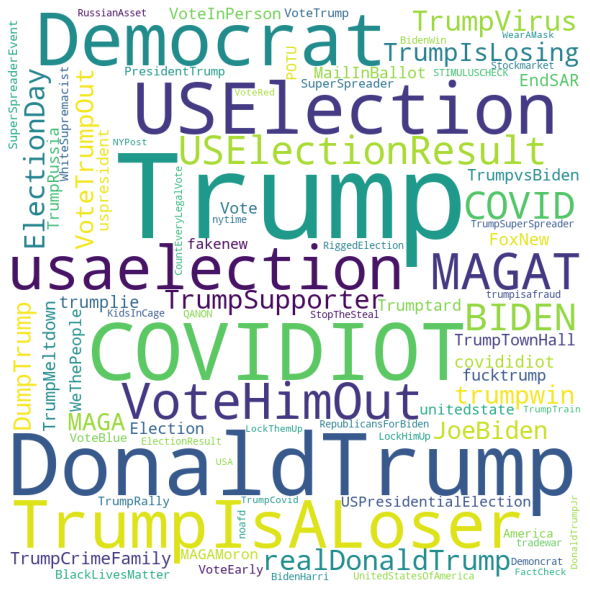

In [24]:
#wordcloud
wordcloud_trump = WordCloud(width = 800, height = 800, background_color = 'white', stopwords = stopwords, 
                     min_font_size = 10).generate(text_hash_trump)

plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud_trump) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [25]:
#get only swing states
swing_trump = trump[(trump['state'] == 'Michigan') | (trump['state'] == 'Pennsylvania') | 
                    (trump['state'] == 'Wisonsin')]

#Vader text with sentimental value
# sent = pd.read_csv('/kaggle/input/sentimental/vader_lexicon.txt', sep = '\t', index_col = 0, 
#                    header = None).drop([2,3], axis = 1).rename(columns={1: 'polarity'})

#lower all tweet
swing_trump['tweet'] = swing_trump['tweet'].str.lower()

#Get rid of all punctutations
# punct_re = r'[^(\w)(\s)]'
swing_trump['no_punc'] = swing_trump['tweet'].str.replace(punct_re, ' ', regex = True) 

#Make new dataframe
tidy_format_trump = pd.DataFrame(swing_trump['no_punc'].str.split(expand = True).stack()).reset_index(level = 1).rename(columns = {'level_1' : 'num', 0 : 'word'})

tidy_format2_trump = tidy_format_trump
tidy_format2_trump['index'] = tidy_format_trump.index

#make polarity column
swing_trump['polarity'] = tidy_format2_trump.merge(sent, how = 'left', left_on = 'word', right_on = 0).fillna(0).groupby('index').sum()['polarity']


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the 

In [26]:
swing_trump

created_at      tweet_id  \
8       2020-10-15 00:00:20  1.316529e+18   
19      2020-10-15 00:01:08  1.316530e+18   
62      2020-10-15 00:03:04  1.316530e+18   
75      2020-10-15 00:03:38  1.316530e+18   
111     2020-10-15 00:05:55  1.316531e+18   
...                     ...           ...   
970402  2020-11-08 23:36:49  1.325583e+18   
970436  2020-11-08 23:38:26  1.325583e+18   
970813  2020-11-08 23:54:42  1.325588e+18   
970817  2020-11-08 23:54:51  1.325588e+18   
970827  2020-11-08 23:55:35  1.325588e+18   

                                                    tweet  likes  \
8       one of the single most effective remedies to e...    0.0   
19      @cnnbrk #trump owes #ricardoaguirre $730,000 t...    3.0   
62      #donaldtrump #theinfected @potus is a doofus w...    1.0   
75                   @joebiden #donaldtrump 4 more years!    0.0   
111     @cnn @andersoncooper how many #trump young  #m...    0.0   
...                                                   ...    ...   
970402  ha. wake up! sleepy joe won. @joebiden \n\n#sl...    0.0   
970436  the name #ivankatrump in a crowded #republican...    0.0   
970813  &amp;\n@kmggaryde @darhar981 @appalachiatiger ...    4.0   
970817  @joebiden says we need to "stop treating our o...    0.0   
970827  good article from someone who @joebidennwaa no...    0.0   

        retweet_count               source       user_id  \
8                 0.0      Twitter Web App  5.404769e+08   
19                2.0   Twitter for iPhone  1.946504e+08   
62                0.0  Twitter for Android  2.912734e+09   
75                0.0      Twitter Web App  1.657854e+07   
111               0.0   Twitter for iPhone  1.946504e+08   
...               ...                  ...           ...   
970402            0.0   Twitter for iPhone  1.528700e+08   
970436            0.0  Twitter for Android  2.547793e+08   
970813            0.0  Twitter for Android  9.797794e+08   
970817            0.0      Twitter Web App  5.888048e+08   
970827            0.0  Twitter for Android  1.614124e+09   

                                               user_name user_screen_name  \
8                                                 Jamieo         jamieo33   
19                                             MoClarker        MoClarker   
62                                          Diane Harris        DhLadylaw   
75                                     Scott Seifferlein      Seifferlein   
111                                            MoClarker        MoClarker   
...                                                  ...              ...   
970402                                 Daniel McLaughlin     DanTheHobbit   
970436                          Pennsylvania Consultants   PAconsultants1   
970813  ⁴MR. RUPERT MARCELLE HUCKS📖Iam I am I am📲&Ūr²;✈)      Ruperthucks   
970817                                    Law & Order 🇺🇸      mwlynch1966   
970827                                              Sesi    beachydreamer   

                                         user_description  ...        lat  \
8       Don't know what I am. Can lean left and right,...  ...  40.969989   
19                      Media Maven/Scientist/Fan O Fauci  ...  47.005211   
62      🌊🌊🌊Ambassador For Christ,\nProud Mother and Gr...  ...  39.952724   
75                                   http://t.co/uScd2xa2  ...  42.963241   
111                     Media Maven/Scientist/Fan O Fauci  ...  47.005211   
...                                                   ...  ...        ...   
970402  Regarding BTS: I’m a fan. I’m not a stan. I’m ...  ...  40.969989   
970436  News/Political/Information Curator, Analyst, P...  ...  40.969989   
970813  ⁴ℹam♟♂#wasp✡#jew4Trump🇺🇸#America1st💘#Israel🇸🇻#...  ...  40.335903   
970817  We cannot afford to elect a Democrat President...  ...  39.952724   
970827  BEACH, Former veterinary tech, current #Fibro ...  ...  40.969989   

             long          city                   country      continent  \
8      -77.7

In [27]:
print('Most negative tweets:')
for t in swing_trump.sort_values('polarity').head()['tweet']:
    print('\n  ', t)

Most negative tweets:

   @thewebbix #trump is going down in #flames taking the #gops useless #ussenators with him . every #republican loser who backed this #crook and #killer going down with him , #gencide is a serious #crime this #moron and his pathetic advisor #jaredkushner ignoring the #coronavirus is #criminal

   ffs. there was a plan to kidnap and likely harm if not kill @govwhitmer &amp; #trump is out here with this shit. am i surprised he stoops lower &amp; lower, no, but i’m fucking exhausted with this bullshit. #vote #votebidenharris #votebiden https://t.co/nh3uttawwl

   donald trump rages against china but has a secret bank account there to advance his personal business intersts! chief, liar, thief, fraud, racist,
incompetent ass!
#trump
#potus
#potus45

   donald trump, racist, thief, poor looser, liar, broke ass bitch
#trump
#potus
#potus45
#trumplibrarywillbefilledwithcomicbooks

   @realdonaldtrump @stevekalayjian @varneyco #trump is 'dope sick'
frantically flying
from

In [28]:
print('Most positive tweets:')
for t in swing_biden.sort_values('polarity', ascending = False).head()['tweet']:
    print('\n  ', t)

Most negative tweets:

   i still predict #joebiden will win the presidency and we will hold congress. i hope we win the senate but it's not looking good.  if we can get to 49, and biden wins presidency, kamala harris will be needed as the 50th vote. i wanted the wins to be easy but they aren't. yes it's

   @mikebloomberg mr bloomberg, i’m a senior citizen, raised with values, respect, faith and a love of this country. thank you for your help on behalf of #joebiden. i hope you know this is looked upon with gratitude by many people! just not all were taught to send thank u notes!👏😇

   we did it!! thank you black and latinx voters!!  thank you pennsylvania, especially philadelphia and pittsburgh. biden/harris presidency!! hope is restored to our country. love and respect wins. #electionday #biden #harris #bidenharris #democracy #democrat #blue #love #us

   @ariannahuff who do we admire?

when a praise worthy american like admiral mcraven endorses #joebiden we know who he admires. we k